<a href="https://colab.research.google.com/github/nemodesouza/TCC-AIX/blob/main/analise_fatorial_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# UNIVERSIDADE FEDERAL DE SANTA CATARINA
# CENTRO TECNOLÓGICO
# DEPARTAMENTO DE INFORMÁTICA E ESTATÍSTICA
# GRADUAÇÃO EM SISTEMAS DE INFORMAÇÃO
# TRABALHO DE CONCLUSÃO DE CURSO
# NEMO DE SOUZA

# PA4 = Análise Fatorial Exploratória para PA4
# Script para a análise de fatores subjacentes explicam a variância dos dados coletados pelo checklist

# Carregamento de bibliotecas necessárias
if (!require(psych)) install.packages("psych")  # Para análise fatorial
if (!require(polycor)) install.packages("polycor")  # Para correlação policórica
if (!require(corrplot)) install.packages("corrplot")  # Para visualização de correlações
if (!require(GPArotation)) install.packages("GPArotation")  # Para rotação oblimin

library(psych)
library(polycor)
library(corrplot)
library(GPArotation)

Loading required package: psych

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘psych’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Loading required package: polycor

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘polycor’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘admisc’


Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: GPArotation


Attaching package: ‘psych’


The following objects are masked from ‘

In [2]:
# Carregamento dos dados
dados <- read.csv("PA2 a PA4 - matrix_avaliacao_aplicativos.csv", stringsAsFactors = FALSE)
heuristicas <- read.csv("matriz_heuristicas_e_itens_checklist.csv", stringsAsFactors = FALSE)

# Verificação da estrutura dos dados
str(dados)
head(dados)

# Verificação da estrutura das heurísticas
str(heuristicas)
head(heuristicas)

# Seleção das colunas dos itens (c1 a c23)
itens <- dados[, grep("^c\\d+$", names(dados))]

# Conversão das respostas para valores numéricos (Sim = 1, Não = 0, NA = NA)
itens_num <- as.data.frame(lapply(itens, function(x) {
  ifelse(x == "Sim", 1, ifelse(x == "Não", 0, NA))
}))

# Verificação da conversão
head(itens_num)

'data.frame':	127 obs. of  25 variables:
 $ N.         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Nome.do.App: chr  "AI Dermatologist: Skin Scanner" "ArchAIDE" "Bird ID - Picture Identifier" "Bird Identification Apps" ...
 $ c1         : chr  "Sim" "Sim" "Sim" "Sim" ...
 $ c2         : chr  "Não" "Não" "Não" "Não" ...
 $ c3         : chr  "Sim" "Sim" "Sim" "Sim" ...
 $ c4         : chr  "Sim" "Não" "Não" "Não" ...
 $ c5         : chr  "Sim" "Sim" "Sim" "Sim" ...
 $ c6         : chr  "Sim" "Não" "Sim" "Sim" ...
 $ c7         : chr  "Não" "Não" "Sim" "Não" ...
 $ c8         : chr  "Sim" NA NA NA ...
 $ c9         : chr  NA NA NA NA ...
 $ c10        : chr  "Sim" "Não" "Não" "Não" ...
 $ c11        : chr  "Sim" "Sim" "Não" "Não" ...
 $ c12        : chr  "Não" "Não" "Não" "Não" ...
 $ c13        : chr  "Não" "Não" "Não" "Não" ...
 $ c14        : chr  "Não" "Não" "Sim" "Não" ...
 $ c15        : chr  "Não" "Não" "Sim" "Não" ...
 $ c16        : chr  "Não" NA NA NA ...
 $ c17        : chr  NA NA NA NA

,N.,Nome.do.App,c1,c2,c3,c4,c5,c6,c7,c8,⋯,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,AI Dermatologist: Skin Scanner,Sim,Não,Sim,Sim,Sim,Sim,Não,Sim,⋯,Não,Não,Não,NA,Sim,NA,Sim,NA,Não,Sim
2,2,ArchAIDE,Sim,Não,Sim,Não,Sim,Não,Não,NA,⋯,Não,Não,NA,NA,Sim,NA,Sim,NA,NA,NA
3,3,Bird ID - Picture Identifier,Sim,Não,Sim,Não,Sim,Sim,Sim,NA,⋯,Sim,Sim,NA,NA,Sim,NA,Sim,NA,NA,NA
4,4,Bird Identification Apps,Sim,Não,Sim,Não,Sim,Sim,Não,NA,⋯,Não,Não,NA,NA,Sim,NA,Sim,NA,NA,NA
5,5,CamFind,Sim,Não,Sim,Não,Sim,Não,NA,NA,⋯,NA,Não,NA,Não,NA,NA,Sim,NA,NA,NA
6,6,Cash Reader: Bill Identifier,Sim,Não,Sim,Não,Não,Não,NA,NA,⋯,Não,Não,NA,NA,Sim,NA,Sim,NA,NA,NA


'data.frame':	23 obs. of  6 variables:
 $ ID.Heurística     : chr  "h1" "h1" "h1" "h2" ...
 $ Heurística        : chr  "Deixar as expectativas e limitações explícitas" "Deixar as expectativas e limitações explícitas" "Deixar as expectativas e limitações explícitas" "Apoiar o uso efetivo" ...
 $ ID.checklist      : chr  "c1" "c2" "c3" "c4" ...
 $ Item.de.checklist : chr  "1. O app deixa claro quais classes ele pode classificar?" "2. O aplicativo deixa claro o quão bem ele pode fazer a classificação de imagens?" "3. O aplicativo fornece explicações compreensíveis?" "4. O app mostra dicas de como tirar fotos com qualidade adequada?" ...
 $ Explicação.do.item: chr  "O app apresenta as classes que é capaz de distinguir antes do usuário poder classificar uma imagem. (p.ex. na tela home)." "O app apresenta ao usuário o grau do seu desempenho (p.ex. acurácia) antes do usuário poder classificar uma ima"| __truncated__ "O app utiliza apenas uma terminologia compreensível pelo público alvo, evita

,ID.Heurística,Heurística,ID.checklist,Item.de.checklist,Explicação.do.item,Escala.de.resposta
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,h1,Deixar as expectativas e limitações explícitas,c1,1. O app deixa claro quais classes ele pode classificar?,O app apresenta as classes que é capaz de distinguir antes do usuário poder classificar uma imagem. (p.ex. na tela home).,"Sim, Não"
2,h1,Deixar as expectativas e limitações explícitas,c2,2. O aplicativo deixa claro o quão bem ele pode fazer a classificação de imagens?,O app apresenta ao usuário o grau do seu desempenho (p.ex. acurácia) antes do usuário poder classificar uma imagem. p.ex. na tela home).,"Sim, Não"
3,h1,Deixar as expectativas e limitações explícitas,c3,3. O aplicativo fornece explicações compreensíveis?,"O app utiliza apenas uma terminologia compreensível pelo público alvo, evitando jargão técnico, ao apresentar as expectativas e limitações.","Sim, Não"
4,h2,Apoiar o uso efetivo,c4,4. O app mostra dicas de como tirar fotos com qualidade adequada?,O app apresenta instruções/dicas para guiar o usuário a tirar fotos com qualidade adequada para a classificação.,"Sim, Não"
5,h2,Apoiar o uso efetivo,c5,5. O app visualiza o status durante o processamento da classificação?,O app apresenta elementos para visualizar o status do progresso durante o processamento da classificação.,"Sim, Não"
6,h3,Apoiar a compreensão do usuário sobre incerteza e a confiança do modelo,c6,6. O app deixa claro que existe incerteza em relação ao resultado da classificação?,O resultado da classificação é apresentado indicando que existe uma incerteza em relação a este resultado.,"Sim, Não"


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,⋯,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,1,1,1,0,1,NA,1,⋯,0,0,0,NA,1,NA,1,NA,0,1
2,1,0,1,0,1,0,0,NA,NA,0,⋯,0,0,NA,NA,1,NA,1,NA,NA,NA
3,1,0,1,0,1,1,1,NA,NA,0,⋯,1,1,NA,NA,1,NA,1,NA,NA,NA
4,1,0,1,0,1,1,0,NA,NA,0,⋯,0,0,NA,NA,1,NA,1,NA,NA,NA
5,1,0,1,0,1,0,NA,NA,0,0,⋯,NA,0,NA,0,NA,NA,1,NA,NA,NA
6,1,0,1,0,0,0,NA,NA,NA,0,⋯,0,0,NA,NA,1,NA,1,NA,NA,NA


In [3]:
# Criação do dicionário para mapear códigos de itens para descrições de heurísticas
id_heuristicas <- heuristicas$ID.Heurística
descricoes_heuristicas <- heuristicas$Heurística
codigos_itens <- heuristicas$ID.checklist
descricoes_itens <- heuristicas$Item.de.checklist

# Criação dataframe de mapeamento
dicionario <- data.frame(
  codigo_item = codigos_itens,
  descricao_item = descricoes_itens,
  id_heuristica = id_heuristicas,
  descricao_heuristica = descricoes_heuristicas,
  stringsAsFactors = FALSE
)


In [5]:
# Identificação e remoção de colunas problemáticas
# Cálculo da porcentagem de NAs em cada coluna
na_percentagem <- colMeans(is.na(itens_num)) * 100
print("Porcentagem de NAs em cada coluna:")
print(na_percentagem)

# Cálculo do desvio padrão de cada coluna
desvios <- sapply(itens_num, sd, na.rm = TRUE)
print("Desvio padrão de cada coluna:")
print(desvios)

# Colunas com desvio padrão zero ou muito baixo
colunas_desvio_zero <- names(desvios[desvios < 0.1 | is.na(desvios)])
print("Colunas com desvio padrão próximo de zero ou NA:")
print(colunas_desvio_zero)

# Colunas com muitos NAs (mais de 30%)
colunas_muitos_na <- names(na_percentagem[na_percentagem > 30])
print("Colunas com mais de 30% de NAs:")
print(colunas_muitos_na)

# Colunas a serem removidas (desvio zero ou muitos NAs)
colunas_remover <- unique(c(colunas_desvio_zero, colunas_muitos_na))
print("Colunas a serem removidas:")
print(colunas_remover)

# Conjunto de dados limpo
itens_limpos <- itens_num[, !(names(itens_num) %in% colunas_remover)]

# Verificação das dimensões do conjunto de dados após limpeza
print("Dimensões do conjunto de dados após limpeza:")
print(dim(itens_limpos))

# Dataframe com informações detalhadas sobre os itens removidos
itens_removidos <- data.frame(
  codigo = colunas_remover,
  proporcao_na = na_percentagem[colunas_remover],
  id_heuristica = sapply(colunas_remover, function(codigo) {
    idx <- which(dicionario$codigo_item == codigo)
    if (length(idx) > 0) dicionario$id_heuristica[idx[1]] else NA
  }),
  descricao_heuristica = sapply(colunas_remover, function(codigo) {
    idx <- which(dicionario$codigo_item == codigo)
    if (length(idx) > 0) dicionario$descricao_heuristica[idx[1]] else NA
  }),
  motivo = sapply(colunas_remover, function(codigo) {
    if (codigo %in% colunas_desvio_zero) {
      if (codigo %in% colunas_muitos_na) {
        return("Desvio padrão próximo de zero e muitos NAs")
      } else {
        return("Desvio padrão próximo de zero")
      }
    } else {
      return("Muitos valores NA")
    }
  })
)

# Ordenação por proporção de NA
itens_removidos <- itens_removidos[order(-itens_removidos$proporcao_na), ]

# Informações detalhadas sobre os itens removidos
print("Detalhes dos itens removidos:")
print(itens_removidos)

# Salvamento da lista de itens removidos para referência futura
write.csv(itens_removidos, "itens_removidos.csv", row.names = FALSE)

# Verificação da distribuição das respostas após limpeza
summary(itens_limpos)

# Cálculo da matriz de correlação policórica
matriz_policorica <- polychoric(itens_limpos, smooth = TRUE, global = FALSE)

# Salvamento da matriz de correlação policórica
write.csv(matriz_policorica$rho, "matriz_correlacao_policorica.csv")

# Visualização da matriz de correlação policórica
print("Matriz de correlação policórica:")
print(round(matriz_policorica$rho, 2))


[1] "Porcentagem de NAs em cada coluna:"
      c1       c2       c3       c4       c5       c6       c7       c8 
 0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 41.73228 76.37795 
      c9      c10      c11      c12      c13      c14      c15      c16 
83.46457  0.00000  0.00000  0.00000  0.00000 11.81102  0.00000 61.41732 
     c17      c18      c19      c20      c21      c22      c23 
80.31496 14.17323 69.29134  0.00000 74.80315 66.14173 69.29134 
[1] "Desvio padrão de cada coluna:"
       c1        c2        c3        c4        c5        c6        c7        c8 
0.4993434 0.3240168 0.3866281 0.4936796 0.4264414 0.5000937 0.5017555 0.4301831 
       c9       c10       c11       c12       c13       c14       c15       c16 
0.4830459 0.2823828 0.4631125 0.5012171 0.4264414 0.4240972 0.4445226 0.2422261 
      c17       c18       c19       c20       c21       c22       c23 
0.4358899 0.4866551 0.3655178 0.3144243 0.4399413 0.4538503 0.2699528 
[1] "Colunas com desvio padrão próxim

       c1               c2               c3               c4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :1.0000   Median :0.0000  
 Mean   :0.4488   Mean   :0.1181   Mean   :0.8189   Mean   :0.4094  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                    
       c5               c6              c10               c11        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.00000   Median :0.0000  
 Mean   :0.7638   Mean   :0.5433   Mean   :0.08661   Mean   :0.3071  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.

Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
“2 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully.”
Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”


[1] "Matriz de correlação policórica:"
       c1    c2    c3    c4    c5    c6   c10   c11   c12   c13   c14   c15
c1   1.00  0.61  0.32  0.24  0.27 -0.10  0.49  0.31 -0.06  0.23  0.32  0.27
c2   0.61  1.00  0.45  0.45  0.07  0.00  0.80  0.43  0.38  0.59  0.35  0.39
c3   0.32  0.45  1.00  0.51  0.33 -0.03  0.23  0.09  0.01  0.21  0.56  0.22
c4   0.24  0.45  0.51  1.00  0.60  0.42  0.42  0.29  0.25  0.68  0.40  0.40
c5   0.27  0.07  0.33  0.60  1.00  0.21 -0.04  0.31 -0.02  0.51  0.38  0.35
c6  -0.10  0.00 -0.03  0.42  0.21  1.00  0.39  0.16  0.08  0.27  0.18  0.09
c10  0.49  0.80  0.23  0.42 -0.04  0.39  1.00  0.32  0.36  0.57  0.36  0.17
c11  0.31  0.43  0.09  0.29  0.31  0.16  0.32  1.00 -0.03  0.26  0.11  0.29
c12 -0.06  0.38  0.01  0.25 -0.02  0.08  0.36 -0.03  1.00  0.67  0.27  0.36
c13  0.23  0.59  0.21  0.68  0.51  0.27  0.57  0.26  0.67  1.00  0.53  0.62
c14  0.32  0.35  0.56  0.40  0.38  0.18  0.36  0.11  0.27  0.53  1.00  0.60
c15  0.27  0.39  0.22  0.40  0.35  0.09  0.17  0.

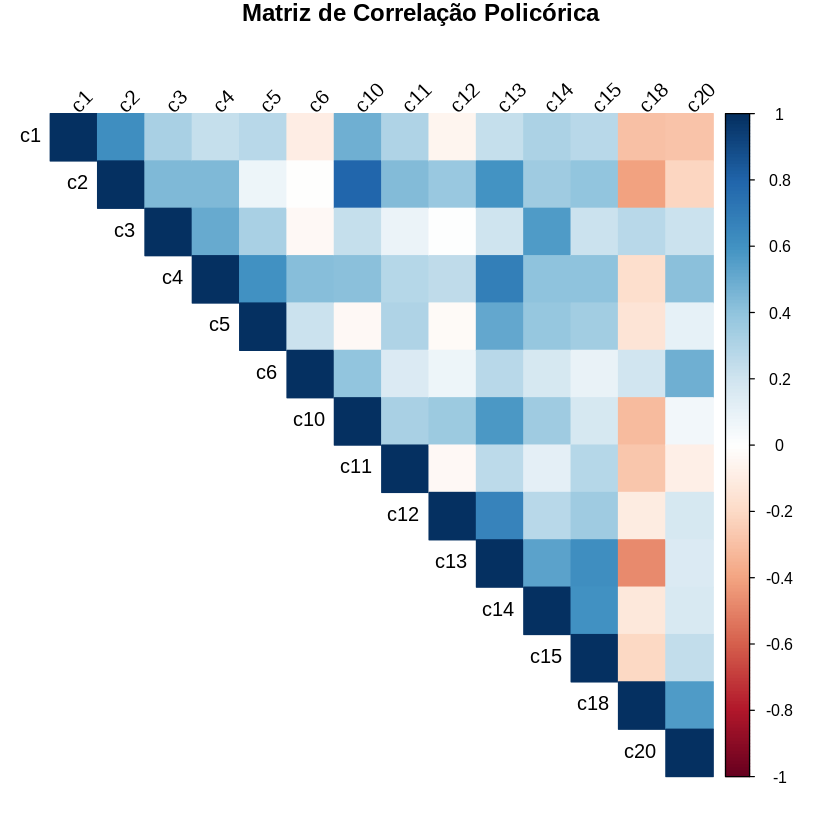

In [6]:
# Criação de um gráfico da matriz de correlação policórica
corrplot(matriz_policorica$rho, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45,
         title = "Matriz de Correlação Policórica",
         mar = c(0, 0, 1, 0))


[1] "Índice KMO (Kaiser-Meyer-Olkin):"
[1] 0.2063215
[1] "Teste de Bartlett para esfericidade:"
$chisq
[1] 6303.501

$p.value
[1] 0

$df
[1] 91

Parallel analysis suggests that the number of factors =  5  and the number of components =  NA 
rrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
(r = matriz_policorica$rho, nfactors = n_fatores, rotate = "oblimin", 
    fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
      ML2   ML1   ML4   ML5   ML3   h2     u2 com
c1   0.60 -0.29  0.27 -0.31  0.16 0.62 0.3763 2.7
c2   0.70  0.25 -0.08 -0.29  0.31 0.90 0.1016 2.1
c3   0.10 -0.04  0.09  0.02  0.96 1.00 0.0050 1.0
c4   0.20  0.30  0.45  0.26  0.29 0.70 0.2963 3.7
c5  -0.16  0.03  0.99  0.03  0.08 1.00 0.0050 1.1
c6   0.39 -0.07  0.22  0.74 -0.24 0.70 0.2965 2.0
c10  0.97  0.12 -0.14  0.16  0.02 1.00 0.0050 1.1
c11  0.39 -0.14  0.34 -0.10 -0.07 0.29 0.7112 2.5
c12  0.02  0.86 -0.19  0.06 -0.04 0.71 0.2877 1.1
c13  0.23  0.74  0.36  0.0

Warning message in file(file, if (append) "a" else "w"):
“cannot open file '/home/ubuntu/pa4_analise/afe_resultados.txt': No such file or directory”


ERROR: Error in file(file, if (append) "a" else "w"): cannot open the connection


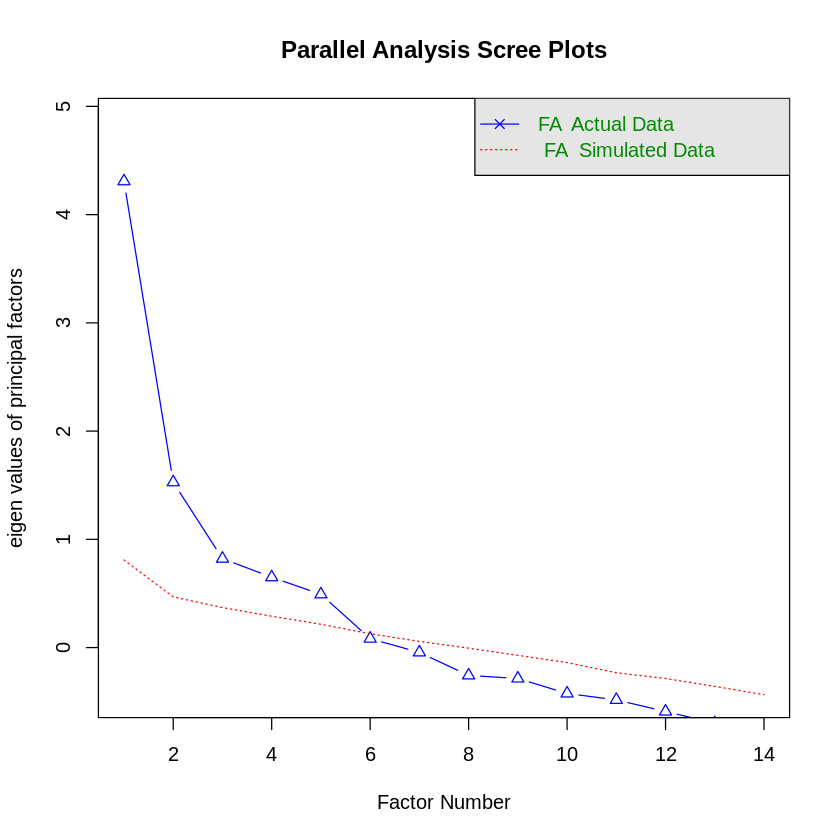

In [7]:
# Verificação da adequação dos dados para AFE
kmo_result <- KMO(matriz_policorica$rho)
print("Índice KMO (Kaiser-Meyer-Olkin):")
print(kmo_result$MSA)

# Teste de Bartlett para esfericidade
bartlett_test <- cortest.bartlett(matriz_policorica$rho, n = nrow(itens_limpos))
print("Teste de Bartlett para esfericidade:")
print(bartlett_test)

# Determinação do número ideal de fatores
scree_data <- fa.parallel(matriz_policorica$rho, n.obs = nrow(itens_limpos), fa = "fa")

# Número sugerido de fatores
n_fatores <- scree_data$nfact
print("Número sugerido de fatores:", n_fatores)

# Realização da análise fatorial exploratória com rotação oblimin
afe_resultado <- fa(matriz_policorica$rho, nfactors = n_fatores, rotate = "oblimin", fm = "ml")
print(afe_resultado)

# Salvamento dos resultados da AFE
sink("afe_resultados.txt")
print(afe_resultado)
sink()


In [8]:
# Cálculo da variância explicada por cada fator
var_explicada <- afe_resultado$Vaccounted
write.csv(var_explicada, "variancia_explicada.csv")

# Exibição da variância explicada
print("Variância explicada por fator:")
print(var_explicada)

# Interpretação dos fatores
# Identificação dos itens com cargas significativas em cada fator
cargas_significativas <- abs(afe_resultado$loadings) > 0.3
itens_por_fator <- list()

for (i in 1:n_fatores) {
  itens_fator <- rownames(afe_resultado$loadings)[cargas_significativas[, i]]
  itens_por_fator[[paste0("Fator", i)]] <- itens_fator

  print(paste0("Itens com cargas significativas no Fator ", i, ":"))
  for (item in itens_fator) {
    idx <- which(dicionario$codigo_item == item)
    if (length(idx) > 0) {
      heuristica <- dicionario$id_heuristica[idx]
      descricao_h <- dicionario$descricao_heuristica[idx]
      print(paste0(item, " (", heuristica, " - ", descricao_h, ")"))
    } else {
      print(item)
    }
  }
  print("")
}

# Salvamento da estrutura de fatores
itens_por_fator_df <- data.frame(
  Fator = rep(names(itens_por_fator), sapply(itens_por_fator, length)),
  Item = unlist(itens_por_fator),
  stringsAsFactors = FALSE
)

itens_por_fator_df$Heuristica <- sapply(itens_por_fator_df$Item, function(item) {
  idx <- which(dicionario$codigo_item == item)
  if (length(idx) > 0) dicionario$id_heuristica[idx[1]] else NA
})

itens_por_fator_df$Descricao_Heuristica <- sapply(itens_por_fator_df$Item, function(item) {
  idx <- which(dicionario$codigo_item == item)
  if (length(idx) > 0) dicionario$descricao_heuristica[idx[1]] else NA
})

write.csv(itens_por_fator_df, "estrutura_fatores.csv", row.names = FALSE)


[1] "Variância explicada por fator:"
                            ML2       ML1       ML4       ML5       ML3
SS loadings           2.5450198 2.3623917 1.9376754 1.8614077 1.6958934
Proportion Var        0.1817871 0.1687423 0.1384054 0.1329577 0.1211352
Cumulative Var        0.1817871 0.3505294 0.4889348 0.6218925 0.7430277
Proportion Explained  0.2446573 0.2271009 0.1862722 0.1789404 0.1630292
Cumulative Proportion 0.2446573 0.4717582 0.6580303 0.8369708 1.0000000
[1] "Itens com cargas significativas no Fator 1:"
[1] "c1 (h1 - Deixar as expectativas e limitações explícitas)"
[1] "c2 (h1 - Deixar as expectativas e limitações explícitas)"
[1] "c6 (h3 - Apoiar a compreensão do usuário sobre \nincerteza e a confiança do modelo)"
[1] "c10 (h3 - Apoiar a compreensão do usuário sobre \nincerteza e a confiança do modelo)"
[1] "c11 (h4 - Assegurar privacidade e segurança de dados)"
[1] ""
[1] "Itens com cargas significativas no Fator 2:"
[1] "c12 (h5 - Falhar graciosamente e suportar a recupera

In [10]:
# Salvamento das cargas fatoriais completas
cargas_fatoriais <- as.data.frame(unclass(afe_resultado$loadings))
cargas_fatoriais$Item <- rownames(afe_resultado$loadings)

# Adicionar informações sobre heurísticas
cargas_fatoriais$Heuristica <- sapply(cargas_fatoriais$Item, function(item) {
  idx <- which(dicionario$codigo_item == item)
  if (length(idx) > 0) dicionario$id_heuristica[idx[1]] else NA
})

cargas_fatoriais$Descricao_Item <- sapply(cargas_fatoriais$Item, function(item) {
  idx <- which(dicionario$codigo_item == item)
  if (length(idx) > 0) dicionario$descricao_item[idx[1]] else NA
})

# Reordenar colunas para melhor visualização
cargas_fatoriais <- cargas_fatoriais[, c("Item", "Heuristica", "Descricao_Item",
                                         names(cargas_fatoriais)[1:n_fatores])]

write.csv(cargas_fatoriais, "cargas_fatoriais_completas.csv", row.names = FALSE)

# Conclusão da análise
print("=== Conclusão da Análise ===")
print(paste("Número de fatores identificados:", n_fatores))
print(paste("Variância total explicada:", sum(var_explicada[1, 1:n_fatores])))
print("Análise fatorial exploratória concluída.")


[1] "=== Conclusão da Análise ==="
[1] "Número de fatores identificados: 5"
[1] "Variância total explicada: 10.4023878958554"
[1] "Análise fatorial exploratória concluída."
